# Analysis

In [228]:
%run include/required_libs.py
%matplotlib inline  
cycles = list(range(2013,2019))

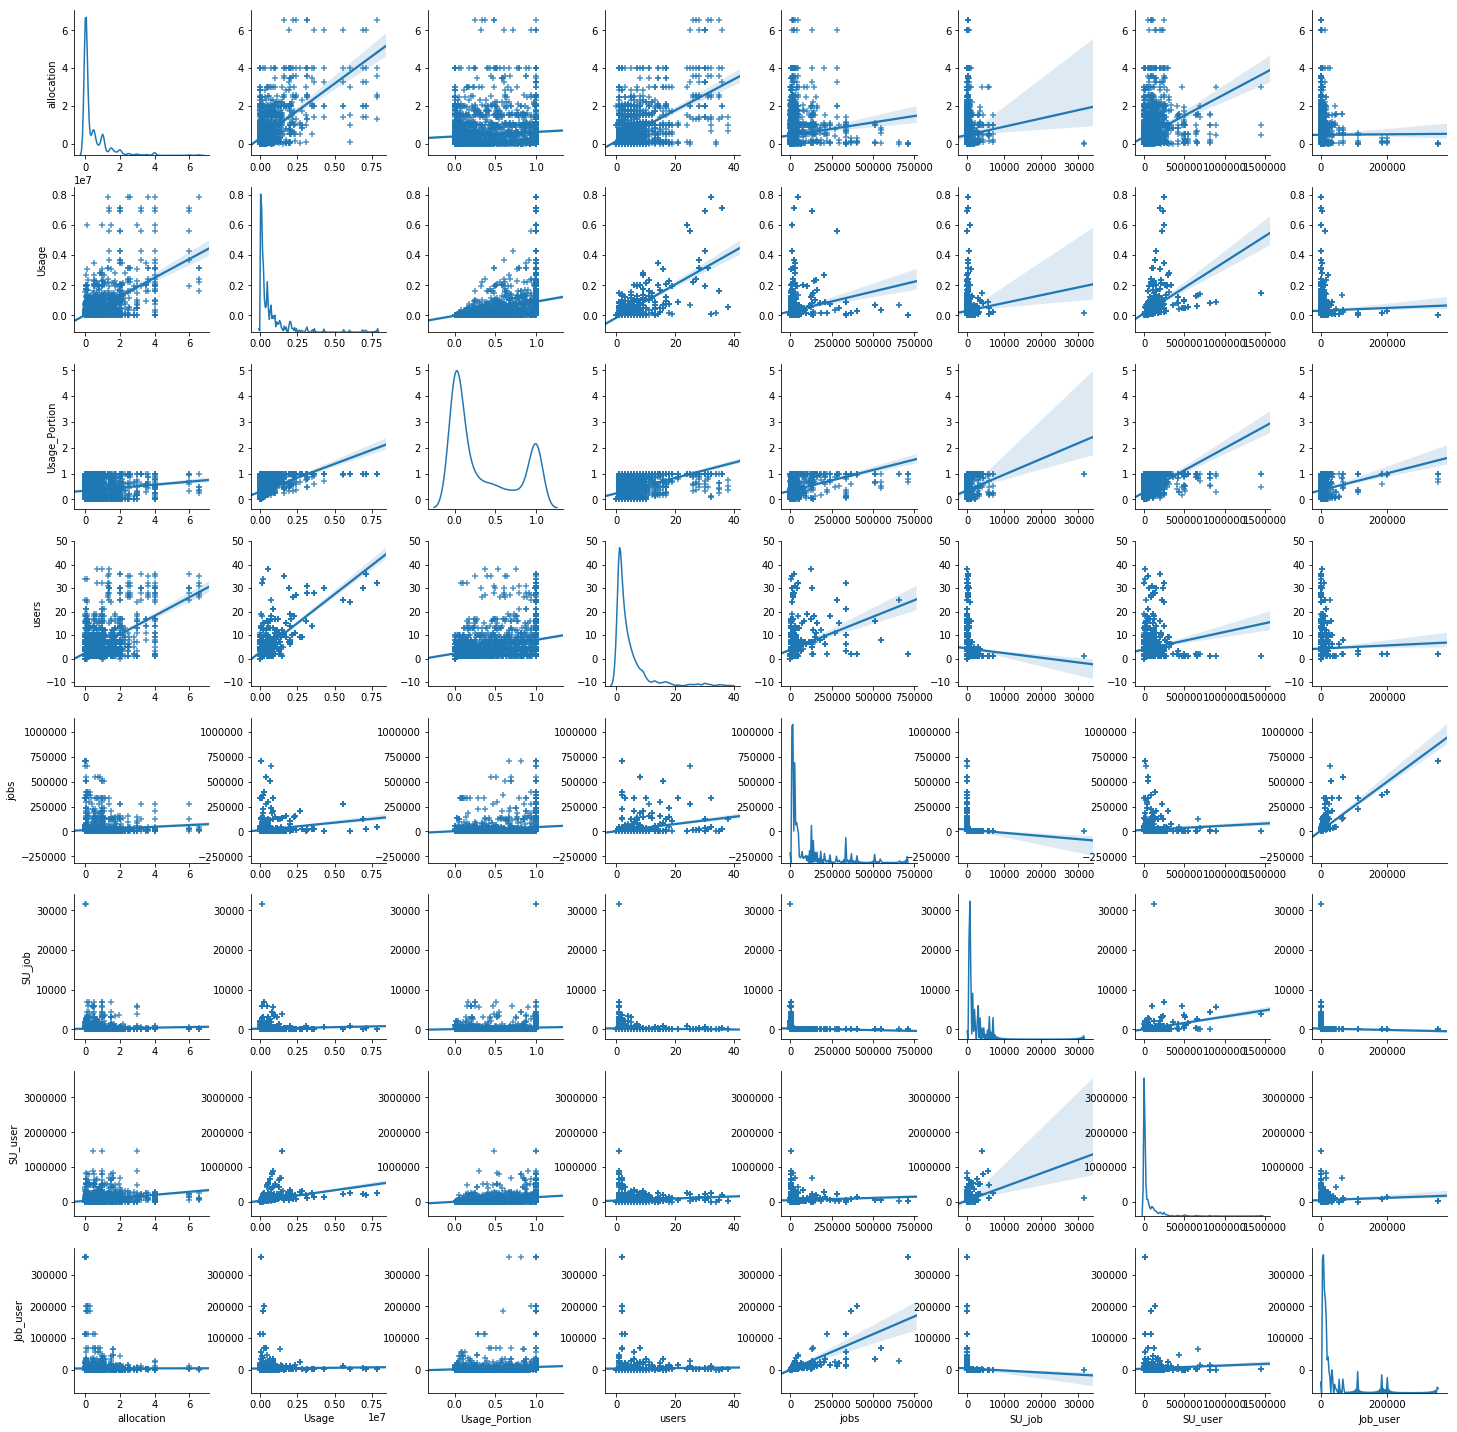

In [229]:
us = pd.read_csv('rawdata/usages_by_cycle_group.csv')
al = pd.read_csv('rawdata/allocs_by_cycle_group.csv')
al = al.drop('cycle',axis=1)
au = al.join(us.set_index('account'), on='account')
au['Usage'] = au['su']
au['Usage_Portion'] = au['su'] / au['allocation']
au['Usage_Portion'][au.Usage_Portion >1] = 1 
au['SU_job'] = au['su'] / au['jobs']
au['SU_user'] = au['su'] / au['users']
au['Job_user'] = au['jobs'] / au['users']

au['allocation'] = au['allocation']/1000000
au['su'] = au['su']/1000000
au.to_csv('result/3_1_Matrix_Analysis.csv')
au5 = au[['allocation','Usage','Usage_Portion','users','jobs','SU_job','SU_user','Job_user']]
au5 = au5.fillna(0)
ax = sns.pairplot(au5,kind='reg',diag_kind ='kde',markers="+");
ax.savefig('image/3_1_Matrix_Analysis.png')

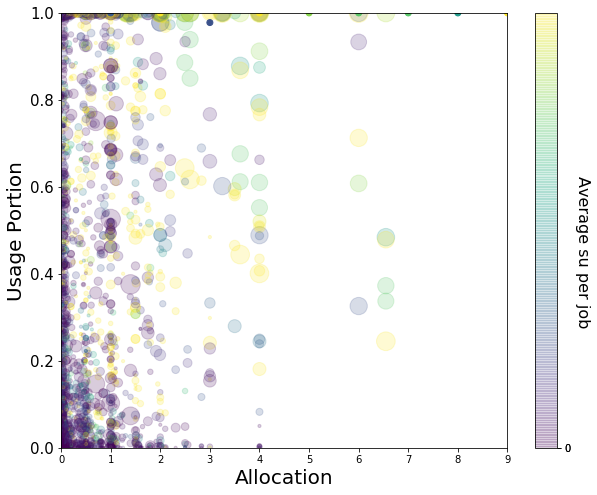

In [250]:
fig, ax = plt.subplots()
au = pd.read_csv('result/3_1_Matrix_Analysis.csv')
au['SU_job'][au.SU_job >200] = 200
ax.scatter(au['allocation'], au['Usage_Portion'], s = au['users']*10, c =au['SU_job'], alpha=.2);
ax.set_ylim(0,1)
ax.set_xlim(0,9)
fig.set_size_inches(10, 8)  

# add colorbar based on axis
def plot_something(ax):
    x = au.index
    y = au['Usage_Portion']
    c = au['SU_job']
    ax.scatter(x,y,c=c)

ax.yaxis.set_tick_params(labelsize=15)   ## tick size
plt.ylabel('Usage Portion', fontsize=20)                             ## label size
plt.xlabel('Allocation', fontsize=20)
plot_something(ax)
cbar = fig.colorbar(mappable=ax.collections[0],ticks=[0,0])
cbar.ax.set_ylabel('Average su per job', rotation=270, fontsize=16, labelpad=20, y=0.45);

#save fih
fig.savefig('image/3_1_portion_allocation_group.png')

In [252]:
us = pd.read_csv('rawdata/usages_by_cycle_group.csv')
al = pd.read_csv('rawdata/allocs_by_cycle_group.csv')
au = pd.merge(us, al,  how='inner', left_on=['account','cycle'], right_on = ['account','cycle']).dropna()
len(au)

668

In [254]:
us = pd.read_csv('rawdata/usages_by_cycle_group.csv')
al = pd.read_csv('rawdata/allocs_by_cycle_group.csv')
au = pd.merge(us, al,  how='inner', left_on=['account','cycle'], right_on = ['account','cycle']).dropna()
au['SU_job'] = au['su'] / au['jobs']
au['SU_user'] = au['su'] / au['users']
au['Job_user'] = au['jobs'] / au['users']
au['allocation'] = au['allocation'] / 1000000
au['su'] = au['su'] / 1000000
#au['SU_job'] = au['SU_job'] /10000
# projection for 2018 usage
au['su'][au.cycle == 2018] = au['su'] * 365 / 219  # 219 is the difference in date of usage record and the beginning of this cycle(10/01/2017)
au['Usage'] = au['su']
au['Usage_Portion_n'] = au['su'] / au['allocation']
#au['Usage_Portion_n'][au.Usage_Portion_n >1] = 1 

#au['Type'] = 0
#au['Type'][au.Usage_Portion_n > 0.95] = 1 
len(au)

668

In [264]:
aa = au[['cycle','account','Usage_Portion_n']]
aa = aa.sort_values(['account','cycle'])
aa

,cycle,account,Usage_Portion_n
51,2014,pi-aachien,0.737425
123,2015,pi-aachien,0.448019
265,2016,pi-aachien,0.328114
388,2017,pi-aachien,0.034105
568,2018,pi-aachien,0.096486
15,2013,pi-aaz,0.806868
65,2014,pi-aaz,0.754738
143,2015,pi-aaz,0.691036
194,2016,pi-aaz,1.849870
383,2017,pi-aaz,0.027234


In [274]:
# Get next year's usage portion
aa = au[['cycle','account','Usage_Portion_n']]
aa = aa.sort_values(['account','cycle'])
# to add Usage_Portion of N+1 year
aa['cy'] = aa['cycle'].shift(1)
aa['ac'] = aa['account'].shift(1)
aa['Next_Portion'] = aa['Usage_Portion_n'].shift(1)
aa = aa.drop(aa[(aa.cycle != aa.cy+1) | (aa.account != aa.ac)].index).dropna()
aa = aa.drop(['account','ac','cy','cycle'], 1)
data = au.join(aa.set_index('Usage_Portion_n'), on='Usage_Portion_n')
feature = data[['Usage','allocation','Usage_Portion_n','Next_Portion',\
              'users','jobs','SU_job','SU_user','Job_user']]

feature = feature.dropna()
feature.to_csv('result/3_1_feature_type.csv',index=False)
len(feature)

411

In [341]:
data = pd.read_csv('result/3_1_feature_type.csv').dropna()
data['Under_usage'] = False
data.loc[data['Next_Portion'] < 0.95, 'Under_usage'] = True

fal = data.loc[data['Under_usage'] == 0]
tru = data.loc[data['Under_usage'] == 1]
tr = tru.sample(len(data[data['Under_usage']==0]))
data = fal.append(tr).sample(frac=1).reset_index(drop=True)

Optimization terminated successfully.
         Current function value: 0.572723
         Iterations 8


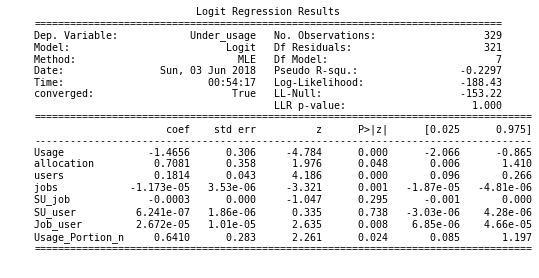

In [342]:

import statsmodels.api as sm
train = data.sample(frac=8/10,random_state=200)
test = data.drop(train.index)

X = train[['Usage','allocation','users','jobs','SU_job','SU_user','Job_user','Usage_Portion_n']]
y = train['Under_usage']

import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
plt.rc('figure', figsize=(7, 7))

plt.text(0.01, 0.05, str(result.summary()), {'fontsize': 16}, fontproperties = 'monospace') # approach improved by OP -> monospace!
plt.axis('off')
plt.tight_layout()
plt.subplots_adjust(left=0.1, right=0.9, top=0.2, bottom=0.1)
plt.savefig("image/3_1_Logistic_Regression.png",bbox_inches='tight')

In [343]:
result.pred_table()

array([[   6.,   52.],
       [  12.,  259.]])

In [299]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=0).fit(data)
kmeans.cluster_centers_

array([[  7.31078770e-01,   8.55564036e-01,   8.81054381e-01,
          1.26778200e+01,   6.66423358e+00,   3.52253723e+04,
          5.16443720e+02,   7.83527520e+04,   8.02293271e+03,
          5.18248175e-01],
       [  1.15967497e+00,   1.36000000e+00,   8.97987309e-01,
          1.24051801e+00,   1.00000000e+00,   3.27540000e+03,
          2.54518539e+03,   8.56334506e+05,   3.27540000e+03,
          0.00000000e+00]])